In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

In [3]:
iteration_number = 2
folder_path = f"EE-GACalifornia/Iteration_{iteration_number}"

In [5]:
def getFitnessValues(folder_path):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    txt_files = [f for f in files if f.endswith('.txt')]
    fileNumber = len(txt_files)
    
    lowest_fitness_values = []
    highest_fitness_values = []
    average_fitness_values = []
    
    for i in range(1, fileNumber + 1):
        
        with open(f'{folder_path}/Gen_{i}.txt', 'r') as file:
            lines = file.readlines()
        
            for line in lines:
                if 'Lowest Fitness' in line:
                    # Extract the value after the keyword, assuming it's space-separated
                    try:
                        # Extract the number from the line
                        fitness_value = float(line.split()[-1])
                        lowest_fitness_values.append(fitness_value)
                    except ValueError:
                        print(f"Could not convert fitness value to float: {line}")
                        print("None")
                elif 'Highest Fitness' in line:
                    # Extract the value after the keyword, assuming it's space-separated
                    try:
                        # Extract the number from the line
                        fitness_value = float(line.split()[-1])
                        highest_fitness_values.append(fitness_value)
                    except ValueError:
                        print(f"Could not convert fitness value to float: {line}")
                        print("None")

                elif 'Average Fitness' in line:
                    # Extract the value after the keyword, assuming it's space-separated
                    try:
                        # Extract the number from the line
                        fitness_value = float(line.split()[-1])
                        average_fitness_values.append(fitness_value)
                    except ValueError:
                        print(f"Could not convert fitness value to float: {line}")
                        print("None")

    return lowest_fitness_values, highest_fitness_values, average_fitness_values

In [7]:
def linear(x, a, b):
    return a * x + b

def exponential(x, a, b):
    return a * np.exp(b * x)

def polynomial(x, a, b, c):
    return a * x**2 + b * x + c

def plotGraph(fitness_values=[], x_label="Generation Count", y_label="Fitness Value", title="Fitness Value", save_path="plot.png", extra_info=""):
    # Find the lowest fitness value
    x = min(fitness_values)
    
    # Create an array of generation indices
    generations = np.arange(len(fitness_values))
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Plot the fitness values against their indices
    ax.plot(generations, fitness_values, 'bo', label='Fitness Values')
    
    # Define models to fit
    models = {
        'Linear': linear,
        'Exponential': exponential,
        'Polynomial (2nd Degree)': polynomial
    }
    
    best_fit_model = None
    best_params = None
    min_residuals = float('inf')
    
    # Fit each model and choose the best fit based on residuals
    for model_name, model in models.items():
        try:
            # Fit the model
            params, _ = curve_fit(model, generations, fitness_values)
            
            # Generate values for the fit line
            x_fit = np.linspace(min(generations), max(generations), 100)
            y_fit = model(x_fit, *params)
            
            # Calculate residuals
            residuals = np.sum((fitness_values - model(generations, *params))**2)
            
            # Update best fit if current model is better
            if residuals < min_residuals:
                min_residuals = residuals
                best_fit_model = (model_name, model, x_fit, y_fit, params)
        
        except Exception as e:
            print(f"Error fitting model {model_name}: {e}")
    
    # Plot the best fit curve
    if best_fit_model:
        model_name, model, x_fit, y_fit, params = best_fit_model
        ax.plot(x_fit, y_fit, label=f'Best Fit: {model_name}')
    
    # Add labels and title
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(f"{title} Graph for Iteration {iteration_number}")
    ax.legend()
    ax.grid(True)
    
    # Add extra information below the graph
    fig.text(0.5, 0.02, extra_info, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
    # Save the plot
    fig.savefig(save_path)
    
    # Show the plot
    plt.show()

In [9]:
def plotGraph(fitness_values=[], x_label="Generation Count", y_label="Fitness Value", title="Fitness Value", save_path="plot.png", extra_info=""):
    # Create an array of generation indices
    generations = np.arange(len(fitness_values))
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Plot the fitness values against their indices, connecting the dots
    ax.plot(generations, fitness_values, 'bo-', label='Fitness Values')  # Connect points with lines
    
    # Add labels and title
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(f"{title} Graph")
    ax.legend()
    ax.grid(True)
    
    # Add extra information below the graph
    fig.text(0.5, 0.02, extra_info, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
    # Save the plot
    fig.savefig(save_path)
    
    # Show the plot
    plt.show()

In [11]:
lowest_fitness_values, highest_fitness_values, average_fitness_values = getFitnessValues(folder_path)

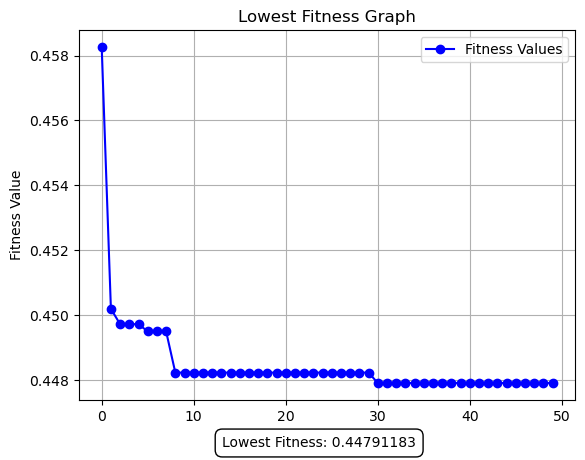

In [13]:
plotGraph(lowest_fitness_values, title=f"Lowest Fitness", save_path=f"{folder_path}/Lowest Fitness.png", extra_info = f"Lowest Fitness: {(min(lowest_fitness_values)):.8f}")

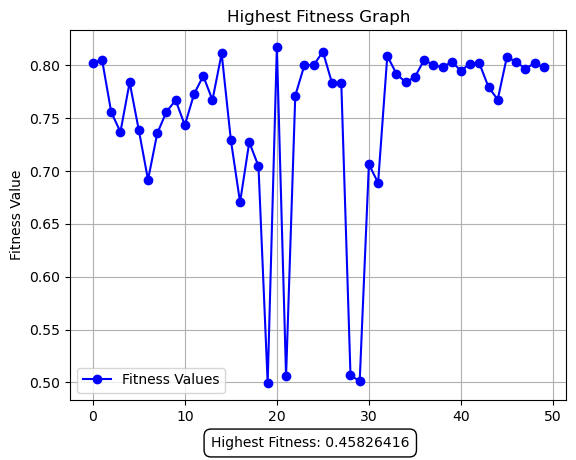

In [15]:
plotGraph(highest_fitness_values, title=f"Highest Fitness" , save_path=f"{folder_path}/Highest Fitness.png", extra_info = f"Highest Fitness: {(max(lowest_fitness_values)):.8f}")

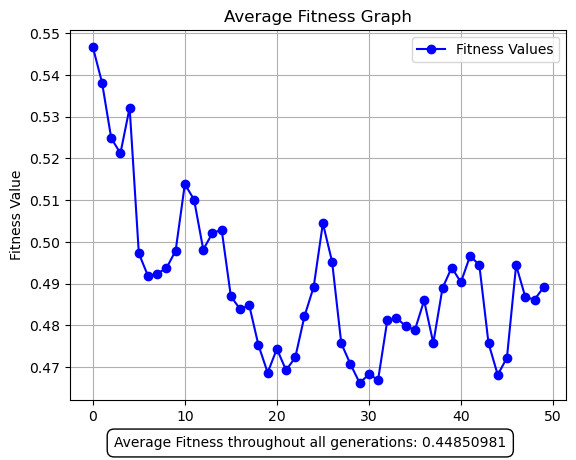

In [17]:
plotGraph(average_fitness_values, title=f"Average Fitness", save_path=f"{folder_path}/Average Fitness.png", extra_info = f"Average Fitness throughout all generations: {((sum(lowest_fitness_values))/len(lowest_fitness_values)):.8f}")